In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

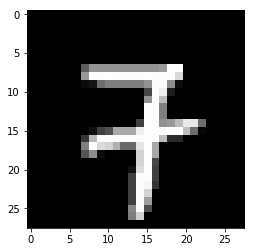

In [4]:
plt.imshow(mnist.train.images[14].reshape(28,28), cmap="gray")

In [5]:
def generator(noise, reuse_vars=None):
    with tf.variable_scope("gen", reuse=reuse_vars):
        # First DenseLayer
        dense = tf.layers.dense(inputs=noise, units=3136, activation=tf.nn.relu, name="dense")
        

        #Reshape
        reshape = tf.reshape(dense, [-1, 56, 56, 1], name="reshape")


        #1 Conv2d
        conv1 = tf.layers.conv2d(inputs=reshape, filters=50, kernel_size=[3,3], strides=2, padding="same", activation=tf.nn.relu, name="conv1")

        #BatchNormalization
        conv1_norm = tf.layers.batch_normalization(conv1, name="batch_norm1")

        #Upsample
        conv1_upsample = tf.image.resize_images(conv1_norm, (56,56))


        #2 Conv2d
        conv2 = tf.layers.conv2d(inputs=conv1_upsample, filters=25, kernel_size=[3,3], strides=2, padding="same", activation=tf.nn.relu, name="conv2")

        #BatchNormalization
        conv2_norm = tf.layers.batch_normalization(conv2, name="batch_norm2")

        #Upsample
        conv2_upsample = tf.image.resize_images(conv2_norm, (56,56))


        #2 Conv2d
        output = tf.layers.conv2d(inputs=conv2_upsample, filters=1, kernel_size=[3,3], strides=2, padding="same", activation=tf.nn.tanh, name="conv3")

        return output
        
        """OLD VERSION   
        hidden1 = tf.layers.dense(inputs=z, units=128)
        
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        output = tf.layers.dense(inputs=hidden2, units=784, activation=tf.nn.tanh)
        
        return output"""

In [6]:
def discriminator(X, reuse_vars=None):
    with tf.variable_scope('dis', reuse=reuse_vars):
        
        conv1 = tf.layers.conv2d(inputs=X, filters=32, kernel_size=[5,5], padding="same", activation=tf.nn.relu, name="conv1")

        pool1 = tf.layers.average_pooling2d(inputs=conv1, pool_size=[2,2], strides=2, name="pool1")

        conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5,5], padding="same", activation=tf.nn.relu, name="conv2")

        pool2 = tf.layers.average_pooling2d(inputs=conv2, pool_size=[2,2], strides=2, name="pool2")

        flat_layer = tf.reshape(pool2, [-1, 7 * 7 * 64], name="flatten")

        # Dense layer
        dense = tf.layers.dense(inputs=flat_layer, units=1024, activation=tf.nn.relu, name="dense")

        # Logits layer
        logits = tf.layers.dense(inputs=dense, units=1)
        
        output = tf.sigmoid(logits)
        
        return output, logits
        
        
        
        
        
        
        
        
        
        
        
        """ OLD VERSION
        hidden1 = tf.layers.dense(inputs=X, units=128)
        
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        logits = tf.layers.dense(inputs=hidden2, units=1)
        
        
        return output, logits"""

In [7]:
real_images = tf.placeholder(tf.float32, shape=[None, 28,28,1])
z = tf.placeholder(tf.float32, shape=[None, 100])


In [8]:
G = generator(z)

In [9]:
D_output_real, D_logits_real = discriminator(real_images)

In [10]:
D_output_fake, D_logits_fake = discriminator(G, reuse_vars=True)

In [11]:
# LOSSES

def loss_func (logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits_in, labels=labels_in))


In [12]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_fake))

D_loss = D_real_loss + D_fake_loss

In [13]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))


In [14]:
learning_rate = 0.001

In [15]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]



In [16]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)

G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [17]:
BATCH_SIZE = 100

EPOCHS = 84

init = tf.global_variables_initializer()


In [18]:
samples = []

In [19]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.8

In [20]:
from tqdm import tqdm

  0%|                                                                                           | 0/84 [00:00<?, ?it/s]

ON EPOCH 0


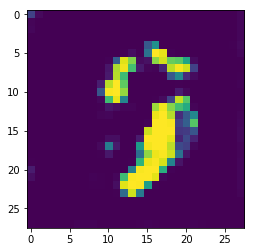

  1%|▉                                                                                  | 1/84 [00:19<26:32, 19.19s/it]

ON EPOCH 1


  2%|█▉                                                                                 | 2/84 [00:35<25:04, 18.35s/it]

ON EPOCH 2


  4%|██▉                                                                                | 3/84 [00:52<24:04, 17.84s/it]

ON EPOCH 3


  5%|███▉                                                                               | 4/84 [01:08<23:20, 17.51s/it]

ON EPOCH 4


  6%|████▉                                                                              | 5/84 [01:25<22:47, 17.31s/it]

ON EPOCH 5


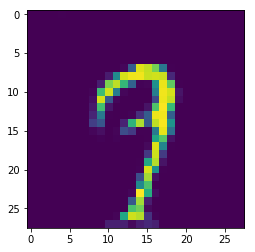

  7%|█████▉                                                                             | 6/84 [01:43<22:35, 17.37s/it]

ON EPOCH 6


  8%|██████▉                                                                            | 7/84 [02:01<22:29, 17.53s/it]

ON EPOCH 7


 10%|███████▉                                                                           | 8/84 [02:28<26:03, 20.57s/it]

ON EPOCH 8


 11%|████████▉                                                                          | 9/84 [02:55<27:51, 22.29s/it]

ON EPOCH 9


 12%|█████████▊                                                                        | 10/84 [03:26<30:42, 24.89s/it]

ON EPOCH 10


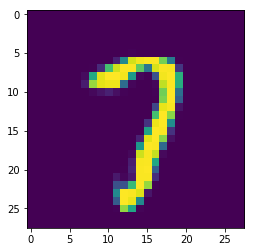

 13%|██████████▋                                                                       | 11/84 [04:00<33:52, 27.84s/it]

ON EPOCH 11


 14%|███████████▋                                                                      | 12/84 [04:35<35:59, 29.99s/it]

ON EPOCH 12


 15%|████████████▋                                                                     | 13/84 [05:22<41:32, 35.11s/it]

ON EPOCH 13


 17%|█████████████▋                                                                    | 14/84 [06:06<43:49, 37.56s/it]

ON EPOCH 14


 18%|██████████████▋                                                                   | 15/84 [06:34<39:58, 34.76s/it]

ON EPOCH 15


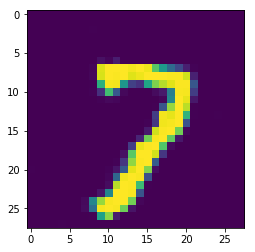

 19%|███████████████▌                                                                  | 16/84 [06:51<33:24, 29.48s/it]

ON EPOCH 16


 20%|████████████████▌                                                                 | 17/84 [07:15<31:11, 27.94s/it]

ON EPOCH 17


 21%|█████████████████▌                                                                | 18/84 [07:39<29:24, 26.73s/it]

ON EPOCH 18


 23%|██████████████████▌                                                               | 19/84 [08:04<28:20, 26.16s/it]

ON EPOCH 19


 24%|███████████████████▌                                                              | 20/84 [08:51<34:21, 32.21s/it]

ON EPOCH 20


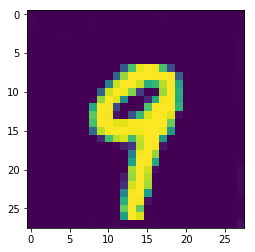

 25%|████████████████████▌                                                             | 21/84 [09:33<36:57, 35.19s/it]

ON EPOCH 21


 26%|█████████████████████▍                                                            | 22/84 [09:55<32:28, 31.42s/it]

ON EPOCH 22


 27%|██████████████████████▍                                                           | 23/84 [10:13<27:43, 27.27s/it]

ON EPOCH 23


 29%|███████████████████████▍                                                          | 24/84 [10:33<25:13, 25.23s/it]

ON EPOCH 24


 30%|████████████████████████▍                                                         | 25/84 [10:57<24:13, 24.64s/it]

ON EPOCH 25


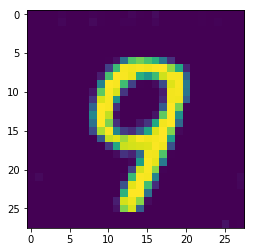

 31%|█████████████████████████▍                                                        | 26/84 [11:20<23:26, 24.25s/it]

ON EPOCH 26


 32%|██████████████████████████▎                                                       | 27/84 [11:44<22:52, 24.07s/it]

ON EPOCH 27


 33%|███████████████████████████▎                                                      | 28/84 [12:07<22:18, 23.90s/it]

ON EPOCH 28


 35%|████████████████████████████▎                                                     | 29/84 [12:45<25:42, 28.05s/it]

ON EPOCH 29


 36%|█████████████████████████████▎                                                    | 30/84 [13:03<22:28, 24.96s/it]

ON EPOCH 30


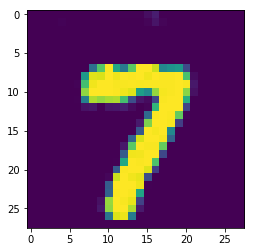

 37%|██████████████████████████████▎                                                   | 31/84 [13:20<19:57, 22.60s/it]

ON EPOCH 31


 38%|███████████████████████████████▏                                                  | 32/84 [13:37<18:08, 20.94s/it]

ON EPOCH 32


 39%|████████████████████████████████▏                                                 | 33/84 [13:54<16:51, 19.83s/it]

ON EPOCH 33


 40%|█████████████████████████████████▏                                                | 34/84 [14:11<15:52, 19.05s/it]

ON EPOCH 34


 42%|██████████████████████████████████▏                                               | 35/84 [14:29<15:07, 18.52s/it]

ON EPOCH 35


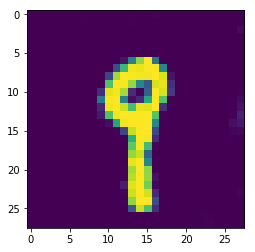

 43%|███████████████████████████████████▏                                              | 36/84 [14:46<14:33, 18.19s/it]

ON EPOCH 36


 44%|████████████████████████████████████                                              | 37/84 [15:03<14:02, 17.93s/it]

ON EPOCH 37


 45%|█████████████████████████████████████                                             | 38/84 [15:21<13:36, 17.74s/it]

ON EPOCH 38


 46%|██████████████████████████████████████                                            | 39/84 [15:38<13:14, 17.66s/it]

ON EPOCH 39


 48%|███████████████████████████████████████                                           | 40/84 [15:55<12:52, 17.55s/it]

ON EPOCH 40


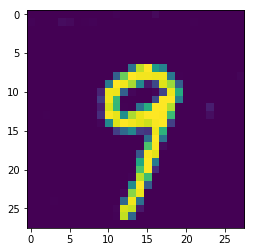

 49%|████████████████████████████████████████                                          | 41/84 [16:13<12:32, 17.51s/it]

ON EPOCH 41


 50%|█████████████████████████████████████████                                         | 42/84 [16:30<12:13, 17.45s/it]

ON EPOCH 42


 51%|█████████████████████████████████████████▉                                        | 43/84 [16:47<11:54, 17.42s/it]

ON EPOCH 43


 52%|██████████████████████████████████████████▉                                       | 44/84 [17:05<11:35, 17.39s/it]

ON EPOCH 44


 54%|███████████████████████████████████████████▉                                      | 45/84 [17:22<11:17, 17.37s/it]

ON EPOCH 45


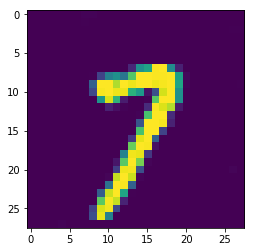

 55%|████████████████████████████████████████████▉                                     | 46/84 [17:40<11:00, 17.39s/it]

ON EPOCH 46


 56%|█████████████████████████████████████████████▉                                    | 47/84 [17:57<10:42, 17.36s/it]

ON EPOCH 47


 57%|██████████████████████████████████████████████▊                                   | 48/84 [18:14<10:24, 17.35s/it]

ON EPOCH 48


 58%|███████████████████████████████████████████████▊                                  | 49/84 [18:31<10:05, 17.31s/it]

ON EPOCH 49


 60%|████████████████████████████████████████████████▊                                 | 50/84 [18:48<09:44, 17.21s/it]

ON EPOCH 50


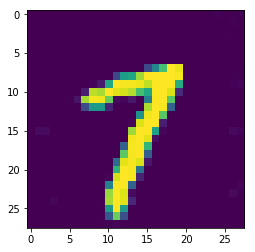

 61%|█████████████████████████████████████████████████▊                                | 51/84 [19:05<09:26, 17.16s/it]

ON EPOCH 51


 62%|██████████████████████████████████████████████████▊                               | 52/84 [19:22<09:06, 17.08s/it]

ON EPOCH 52


 63%|███████████████████████████████████████████████████▋                              | 53/84 [19:39<08:48, 17.03s/it]

ON EPOCH 53


 64%|████████████████████████████████████████████████████▋                             | 54/84 [19:56<08:29, 16.99s/it]

ON EPOCH 54


 65%|█████████████████████████████████████████████████████▋                            | 55/84 [20:13<08:11, 16.96s/it]

ON EPOCH 55


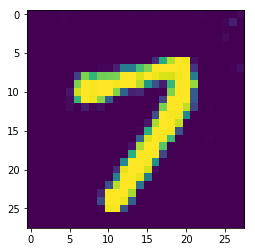

 67%|██████████████████████████████████████████████████████▋                           | 56/84 [20:30<07:55, 16.98s/it]

ON EPOCH 56


 68%|███████████████████████████████████████████████████████▋                          | 57/84 [20:47<07:38, 16.97s/it]

ON EPOCH 57


 69%|████████████████████████████████████████████████████████▌                         | 58/84 [21:04<07:20, 16.95s/it]

ON EPOCH 58


 70%|█████████████████████████████████████████████████████████▌                        | 59/84 [21:21<07:03, 16.94s/it]

ON EPOCH 59


 71%|██████████████████████████████████████████████████████████▌                       | 60/84 [21:38<06:46, 16.93s/it]

ON EPOCH 60


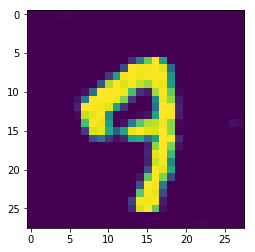

 73%|███████████████████████████████████████████████████████████▌                      | 61/84 [21:55<06:29, 16.95s/it]

ON EPOCH 61


 74%|████████████████████████████████████████████████████████████▌                     | 62/84 [22:12<06:12, 16.94s/it]

ON EPOCH 62


 75%|█████████████████████████████████████████████████████████████▌                    | 63/84 [22:28<05:55, 16.93s/it]

ON EPOCH 63


 76%|██████████████████████████████████████████████████████████████▍                   | 64/84 [22:45<05:38, 16.93s/it]

ON EPOCH 64


 77%|███████████████████████████████████████████████████████████████▍                  | 65/84 [23:02<05:21, 16.93s/it]

ON EPOCH 65


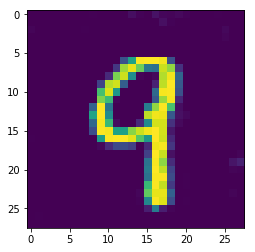

 79%|████████████████████████████████████████████████████████████████▍                 | 66/84 [23:19<05:05, 16.98s/it]

ON EPOCH 66


 80%|█████████████████████████████████████████████████████████████████▍                | 67/84 [23:36<04:48, 16.97s/it]

ON EPOCH 67


 81%|██████████████████████████████████████████████████████████████████▍               | 68/84 [23:53<04:31, 16.97s/it]

ON EPOCH 68


 82%|███████████████████████████████████████████████████████████████████▎              | 69/84 [24:10<04:14, 16.96s/it]

ON EPOCH 69


 83%|████████████████████████████████████████████████████████████████████▎             | 70/84 [24:27<03:57, 16.94s/it]

ON EPOCH 70


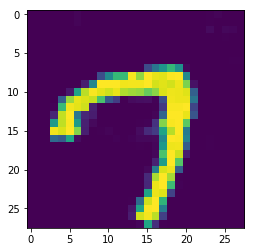

 85%|█████████████████████████████████████████████████████████████████████▎            | 71/84 [24:44<03:40, 16.96s/it]

ON EPOCH 71


 86%|██████████████████████████████████████████████████████████████████████▎           | 72/84 [25:01<03:23, 16.96s/it]

ON EPOCH 72


 87%|███████████████████████████████████████████████████████████████████████▎          | 73/84 [25:18<03:06, 16.94s/it]

ON EPOCH 73


 88%|████████████████████████████████████████████████████████████████████████▏         | 74/84 [25:35<02:49, 16.94s/it]

ON EPOCH 74


 89%|█████████████████████████████████████████████████████████████████████████▏        | 75/84 [25:52<02:32, 16.93s/it]

ON EPOCH 75


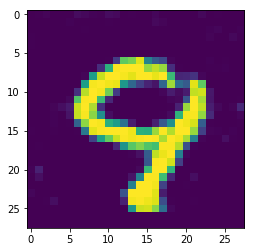

 90%|██████████████████████████████████████████████████████████████████████████▏       | 76/84 [26:09<02:15, 16.96s/it]

ON EPOCH 76


 92%|███████████████████████████████████████████████████████████████████████████▏      | 77/84 [26:26<01:58, 16.95s/it]

ON EPOCH 77


 93%|████████████████████████████████████████████████████████████████████████████▏     | 78/84 [26:43<01:41, 16.94s/it]

ON EPOCH 78


 94%|█████████████████████████████████████████████████████████████████████████████     | 79/84 [27:00<01:24, 16.94s/it]

ON EPOCH 79


 95%|██████████████████████████████████████████████████████████████████████████████    | 80/84 [27:17<01:07, 16.93s/it]

ON EPOCH 80


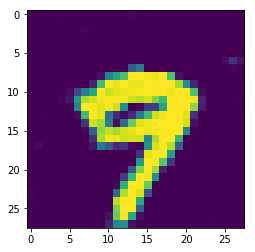

 96%|███████████████████████████████████████████████████████████████████████████████   | 81/84 [27:34<00:50, 16.95s/it]

ON EPOCH 81


 98%|████████████████████████████████████████████████████████████████████████████████  | 82/84 [27:51<00:33, 16.95s/it]

ON EPOCH 82


 99%|█████████████████████████████████████████████████████████████████████████████████ | 83/84 [28:07<00:16, 16.94s/it]

ON EPOCH 83


100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [28:24<00:00, 16.93s/it]


In [21]:
with tf.Session(config=config) as sess:
    sess.run(init)
    
    for epoch in tqdm(range(EPOCHS)):
        
        num_batches = mnist.train.num_examples // BATCH_SIZE
        
        for batch in range(num_batches):
            
            batch = mnist.train.next_batch(BATCH_SIZE)
            batch_images = batch[0].reshape((BATCH_SIZE, 28,28))
            batch_images = np.expand_dims(batch_images, axis=-1)
            
            #print(batch_images.shape)
            
            
            batch_images = batch_images * 2 - 1
            
            
            batch_z = np.random.uniform(-1,1,size=(BATCH_SIZE,100))
            
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z:batch_z})
            
            _ = sess.run(G_trainer, feed_dict={z:batch_z})
            
        print ("ON EPOCH {}".format(epoch))
        
        sample_z = np.random.uniform(-1,1,size=(1,100))
            
        gen_sample = sess.run(generator(z, reuse_vars=True), feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
        if (epoch % 5 == 0):
            plt.imshow(gen_sample.reshape(28,28))
            plt.show()

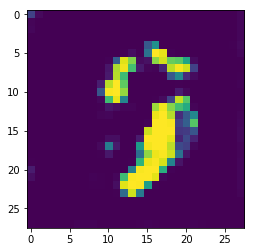

In [22]:
plt.imshow(samples[0].reshape(28,28))

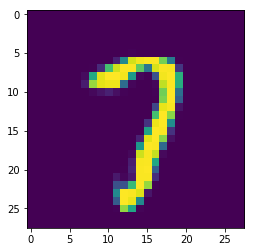

In [23]:
plt.imshow(samples[10].reshape(28,28))

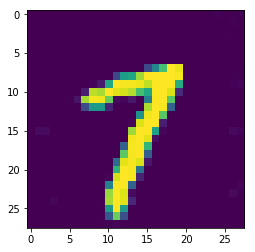

In [24]:
plt.imshow(samples[50].reshape(28,28))

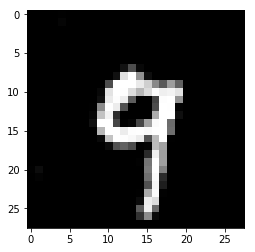

In [25]:
plt.imshow(samples[83].reshape(28,28), cmap = 'gray')

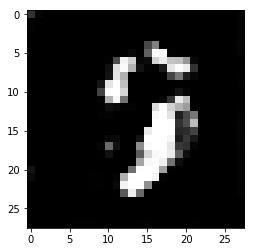

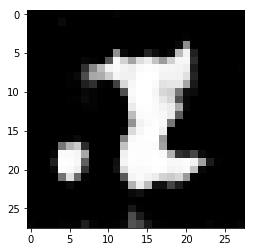

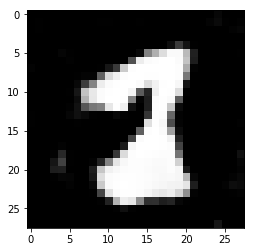

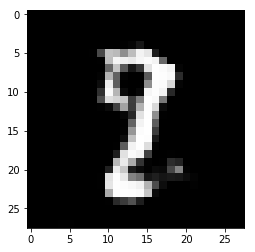

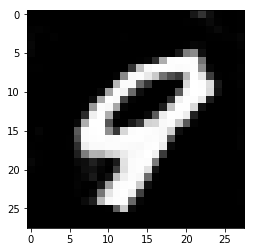

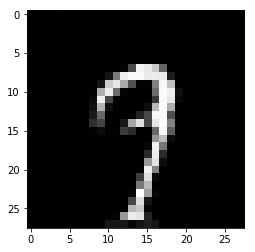

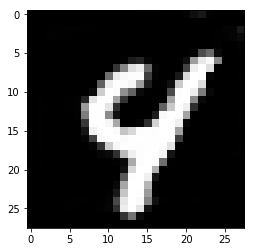

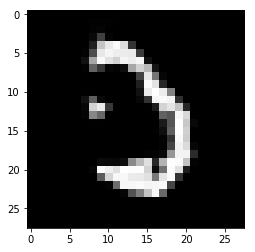

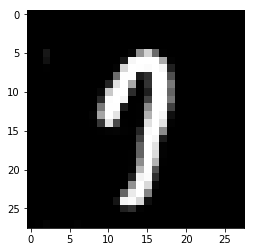

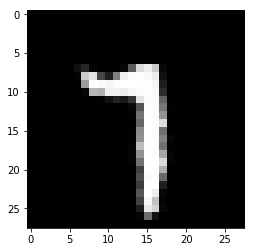

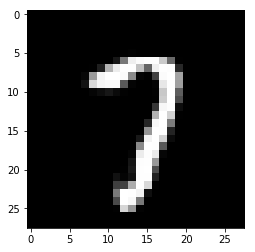

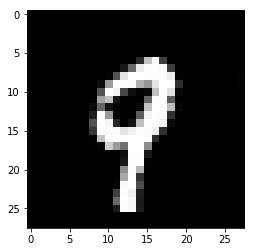

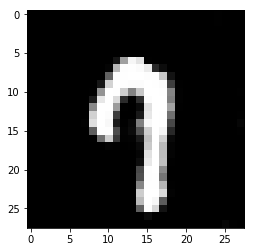

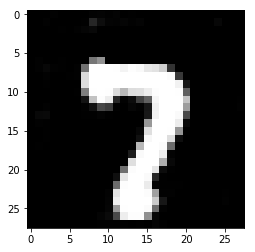

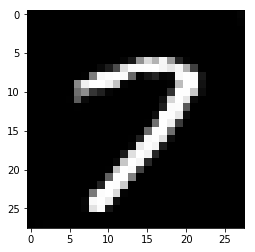

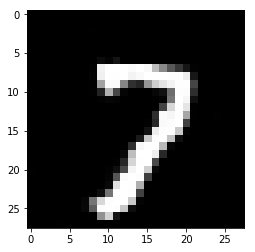

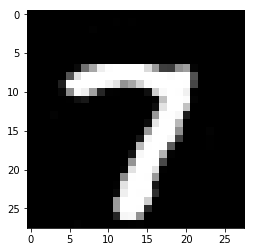

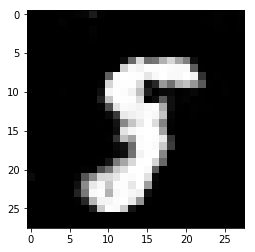

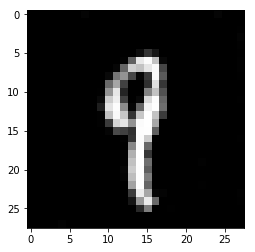

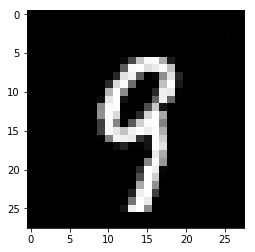

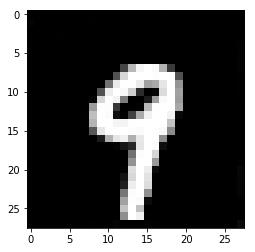

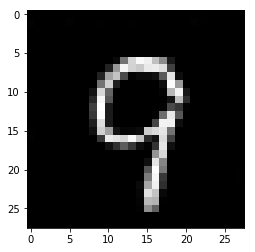

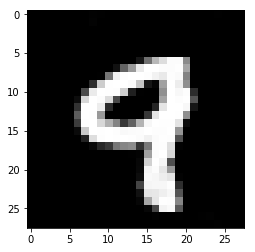

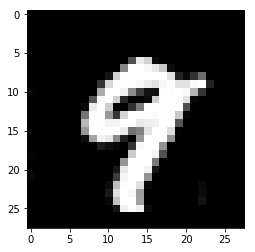

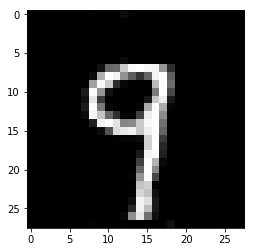

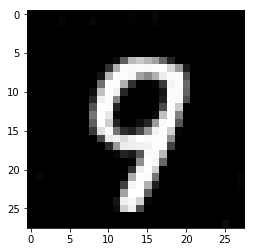

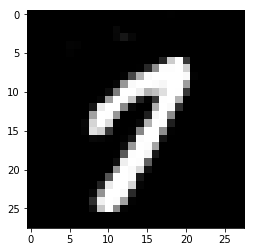

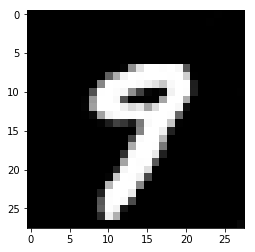

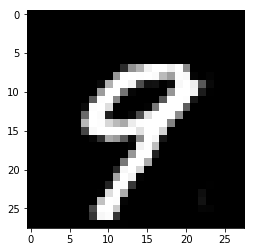

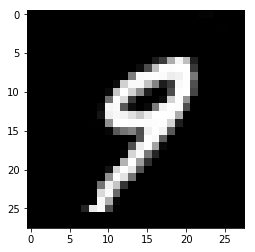

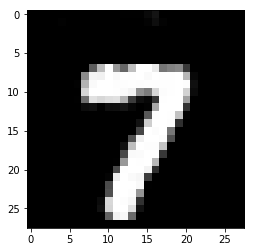

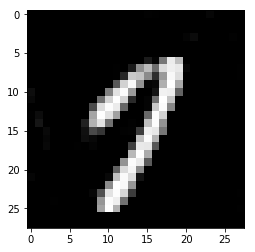

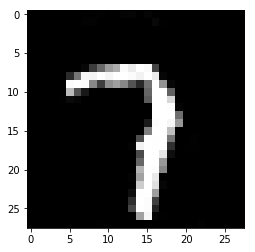

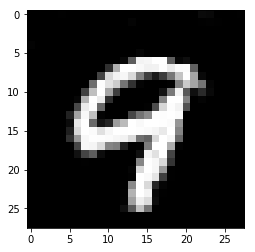

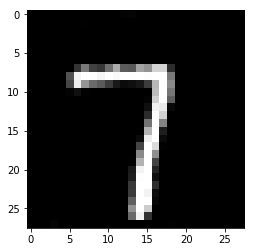

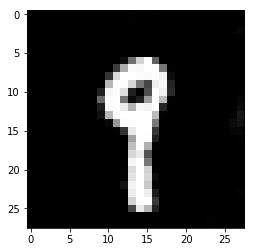

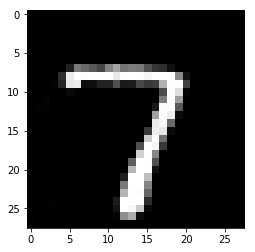

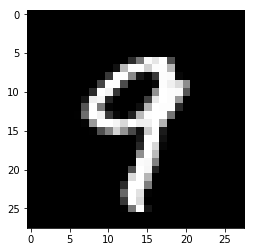

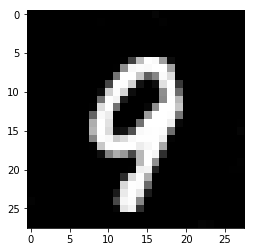

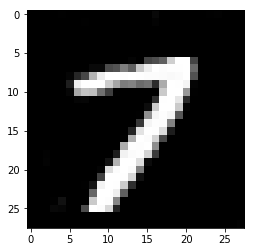

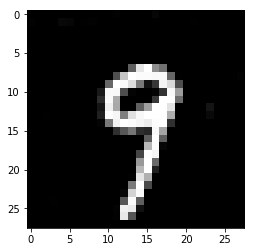

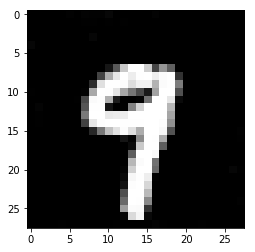

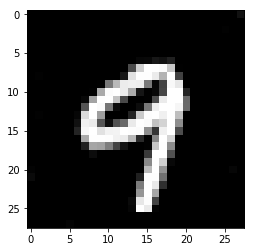

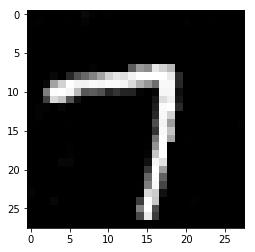

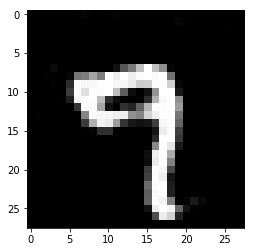

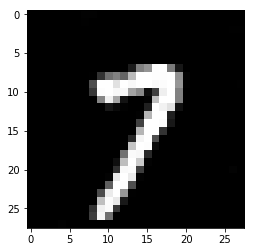

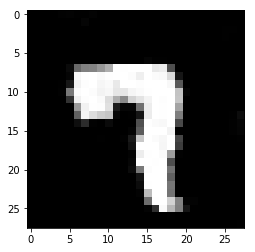

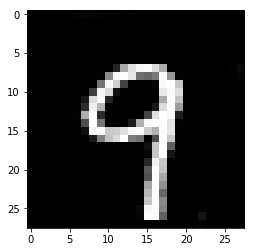

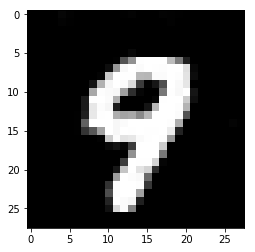

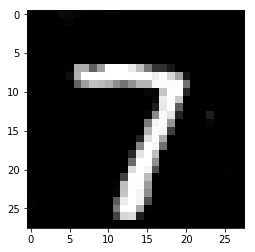

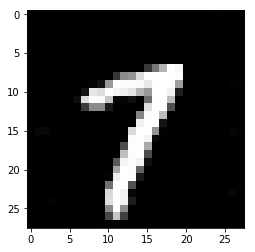

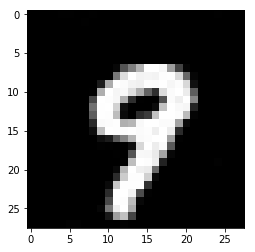

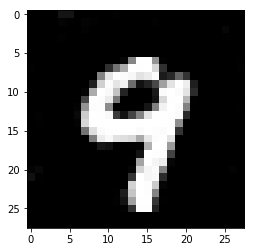

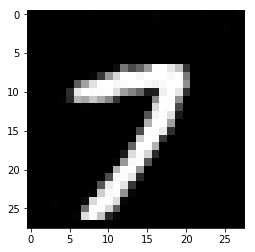

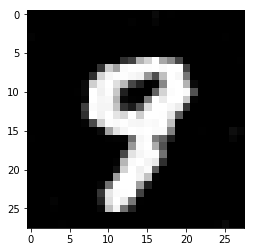

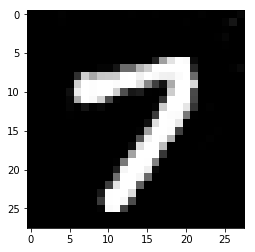

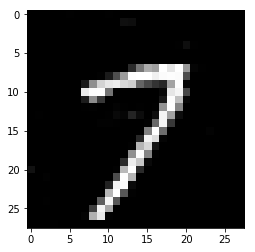

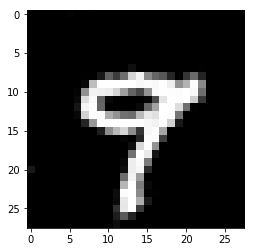

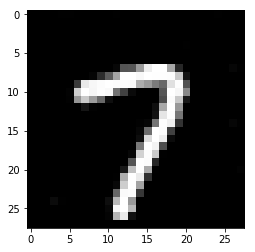

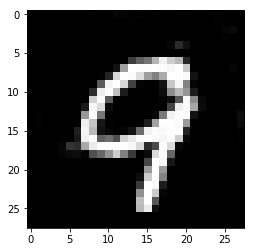

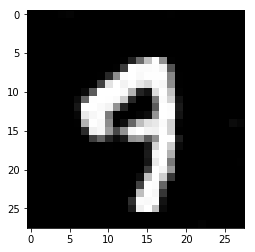

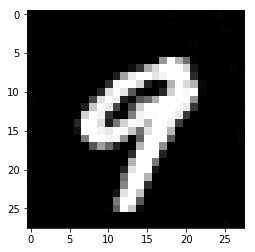

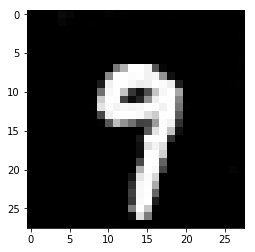

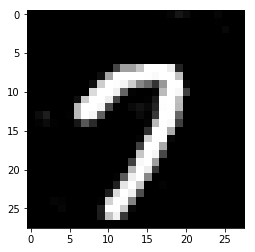

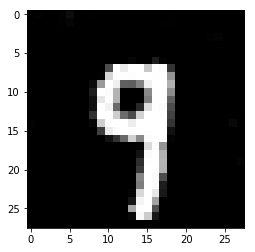

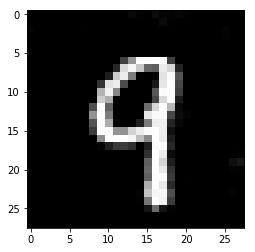

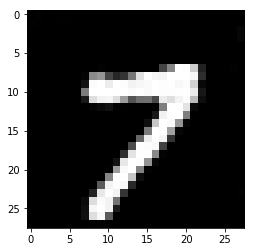

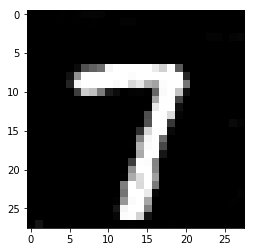

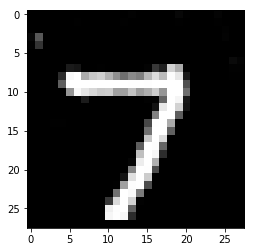

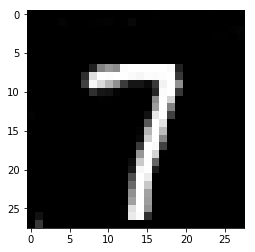

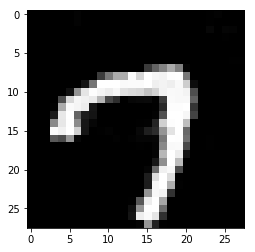

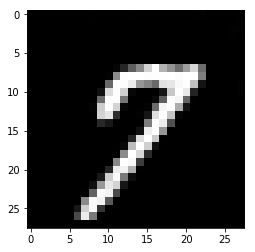

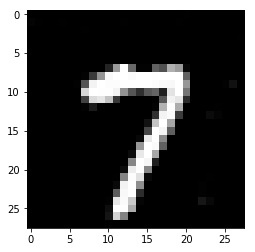

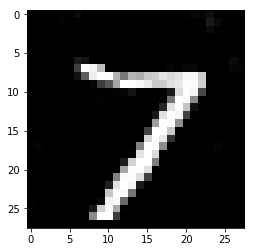

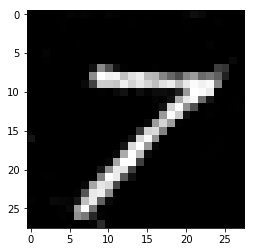

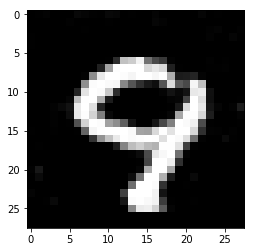

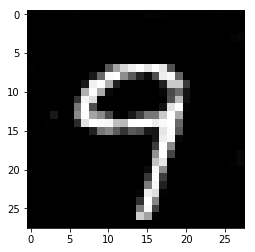

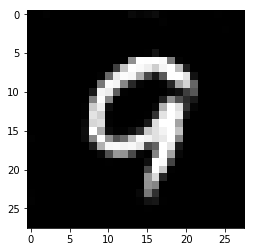

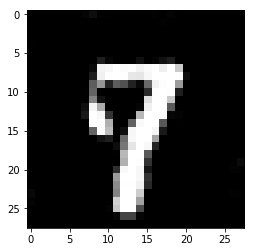

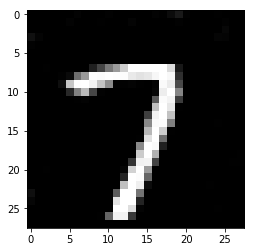

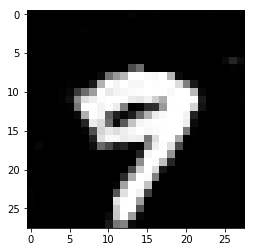

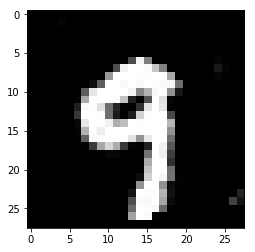

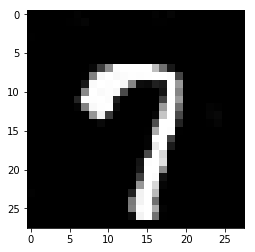

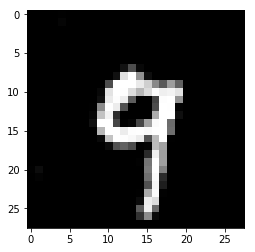

In [27]:
for index, img in enumerate(samples):
    
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.show()